In [2]:
import pickle
def save_pickle(variable, path: str):
    try:
        with open(path, 'wb') as handle:
            pickle.dump(variable, handle, protocol=pickle.HIGHEST_PROTOCOL)
        return 'ok!'
    except Exception as err:
        print("An error occurred!!!: " + str(err))

        
def load_pickle(path):
    try:
        with open(path, 'rb') as handle:
            return pickle.load(handle)
    except Exception as err:
        print("An error occurred!!!: " + str(err))
        return None

In [10]:
groups = load_pickle('groups.pickle')
id_nombre = load_pickle('id_nombre.pickle')

In [9]:
groups_4 = groups[4][:10]
for i in range(10):
    groups_4[i] = set(groups_4[i])

In [ ]:
from rich import print
print(groups_4)

c:\Users\fortu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


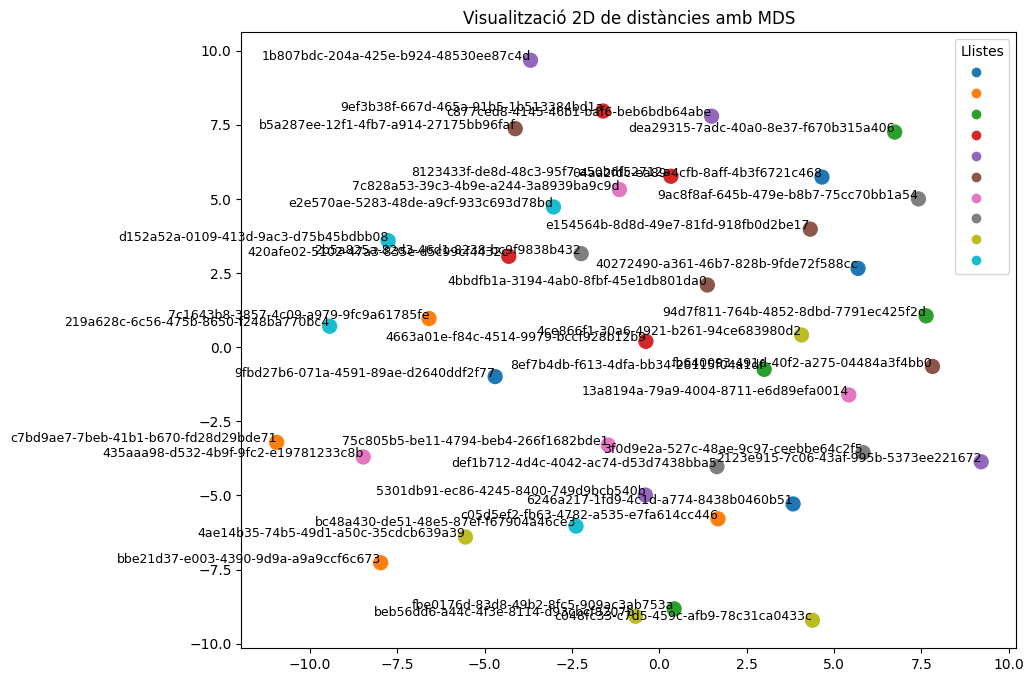

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Exemple de matriu de distàncies (simètrica, diagonal zero)
distance_matrix = load_pickle("distance_matrix.pickle")

# Grups (llistes de grups)

# Assignar etiquetes segons el grup
selected_elements = [item for sublist in groups_4 for item in sublist]
selected_elements = list(set(selected_elements))  # Eliminar duplicats

selected_indices = [i for i in range(4*10)]
# Submatriu de distàncies
sub_distance_matrix = distance_matrix[np.ix_(selected_indices, selected_indices)]

# Etiquetes segons el grup
labels = np.zeros(len(selected_elements), dtype=int)
for i, group in enumerate(groups_4):
    for element in group:
        labels[selected_elements.index(element)] = i
# Reducció de dimensionalitat amb t-SNE
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
embedded = mds.fit_transform(sub_distance_matrix)
# Paleta de colors
colors = plt.cm.tab10  # Una paleta de 10 colors

# Crear el gràfic
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded[:, 0], embedded[:, 1], c=labels, cmap=colors, s=100)

# Afegir noms als punts
for i, txt in enumerate(selected_elements):
    plt.annotate(txt, (embedded[i, 0], embedded[i, 1]), fontsize=9, ha='right')

# Afegir llegenda
legend_labels = [f"Llista {i+1}" for i in range(len(groups_4))]
plt.legend(handles=scatter.legend_elements()[0], title="Llistes")
plt.title("Visualització 2D de distàncies amb MDS")
#plt.xlabel("Dimensió 1")
#plt.ylabel("Dimensió 2")
plt.show()